# Capstone 2: Personality Prediction MBIT

## Proposal
Have you ever been curious about the personality type of yourself and people around 
you? Is there any simple test to help us find the answer without seeing a psychologist? The answer is yes. You can figure out your personality type by simply answering these four questions:

* Are you outwardly or inwardly focused ? 
* How do you prefer to take in information? 
* How do you prefer to make decisions? 
* How do you prefer to live your outer life?

For each question, there are two options to choose from. You choose the side that seems most  natural for you. The options are: Introversion (**I**) or Extraversion (**E**), Sensing (**S**) or Intuition (**N**), Thinking (**T**) or Feeling (**F**) and Judging (**J**) or Perception (**P**) respectively. The introspective self-report questionnaire we introduced above is known as Myers-Briggs -Type- Indicator (MBTI). It is a personality type system that divides everyone into 16 distinct personalities based one their answers to the previous questions. For example, someone who chooses extraversion, sensing, thinking and judging would be labeled an ESTP in the MBTI system. 

This project focuses on using machine learning algorithms to predict the personality of a person from the type of posts they put on social media. The data was collected through the PersonalityCare forum and is available on Kaggle [Personality Prediction Dataset](https://www.kaggle.com/datasnaek/mbti-type). This dataset consists of over 8600 rows representing 8600 different people and 2 columns representing a person’s MBTI personality type and the things they have posted.


## Exploratory Data Analysis

In [7]:
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone2_Personality_Prediction/mbti_1.csv',low_memory=False)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


The length of a post, number of questionmark, exclamation, ellipsis or images in a post might reveal the personality of the owner. We are going to add columns **post_length**, **question_per_post**, **excl_per_post**, **ellipsis_per_post**, **img_per_post**

In [5]:
df['post_length'] = df['posts'].apply(lambda x: len(x.split()))
df['question_per_post'] = df['posts'].apply(lambda x: x.count('?'))
df['img_per_post'] = df['posts'].apply(lambda x: x.count('jpg'))
df['excl_per_post'] = df['posts'].apply(lambda x: x.count('!'))
df['ellipsis_per_post'] = df['posts'].apply(lambda x: x.count('...'))

In [6]:
df.head()

,type,posts,post_length,question_per_post,img_per_post,excl_per_post,ellipsis_per_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,556,18,6,3,15
1,ENTP,'I'm finding the lack of me in these posts ver...,1170,5,1,0,19
2,INTP,'Good one _____ https://www.youtube.com/wat...,836,12,0,4,13
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1064,11,0,3,26
4,ENTJ,'You're fired.|||That's another silly misconce...,967,10,2,1,21


We first want to explore the distribution of different kind of personality.

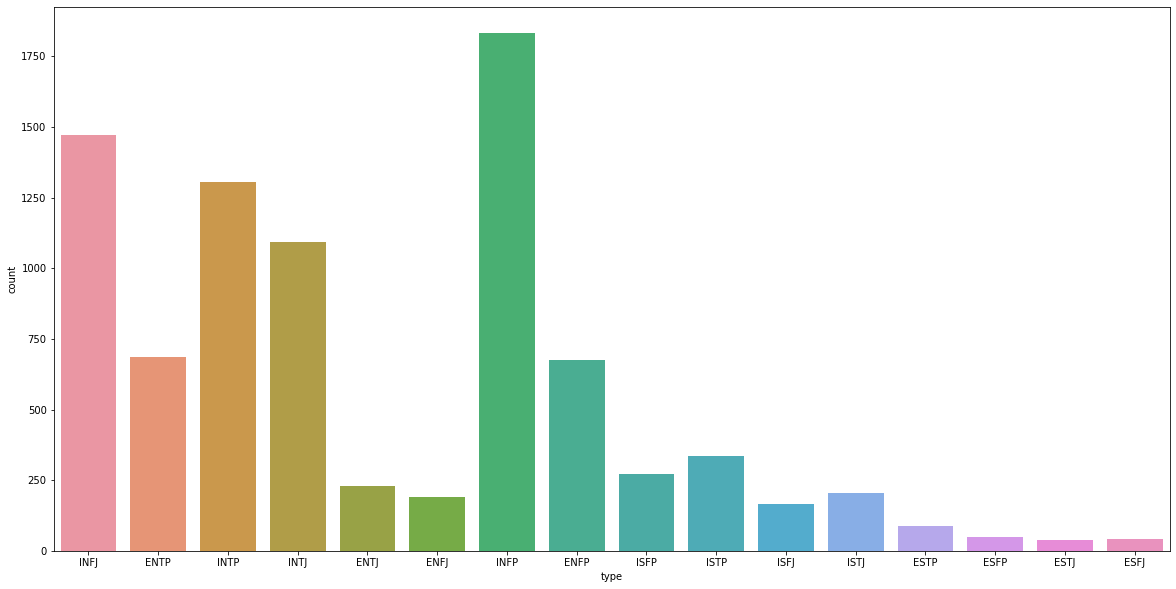

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='type')

In [18]:
df[['type','posts']].groupby('type').count().sort_values(by='posts', ascending=False)

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


It is obvious that the distribution is unbalanced between different classes. The biggest class is **INFP** (Introversion-Intuition-Feeling-Perception) with 1832 people, while the smallest class is **ESTJ** (Extraversion-Sensing-Thinking-Judging) with only 39 people.

We now look at the relations between the type of personality and the length of post, as well as the number of questionmarks, exclamations, ellipsis and images per post.

In [19]:
df[['type','post_length']].groupby('type').mean().sort_values(by='post_length', ascending=False)

,post_length
type,
ESFJ,1290.476190
ENFJ,1286.584211
INFJ,1278.431973
ENFP,1260.770370
INFP,1244.552948
ISFJ,1241.295181
ESTJ,1229.538462
ENTJ,1218.086580
ISTJ,1213.224390


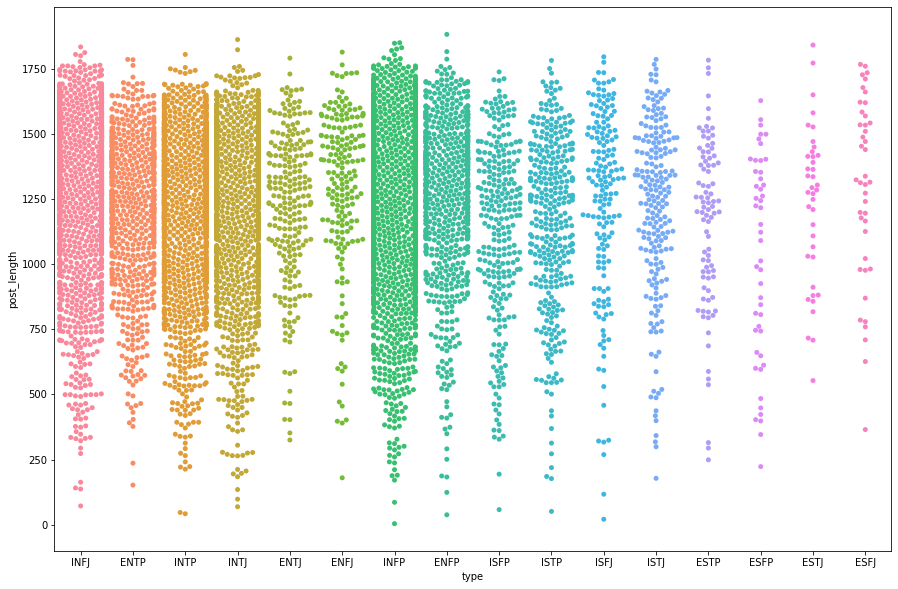

In [25]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "post_length", data=df)

In [21]:
df[['type','question_per_post']].groupby('type').mean().sort_values(by='question_per_post', ascending=False)

,question_per_post
type,
ESTP,12.292135
ENTJ,12.000000
ESFP,11.854167
ENFP,11.362963
ISTP,11.080119
INTP,11.078988
ENTP,11.048175
ISFP,10.819188
ISTJ,10.746341


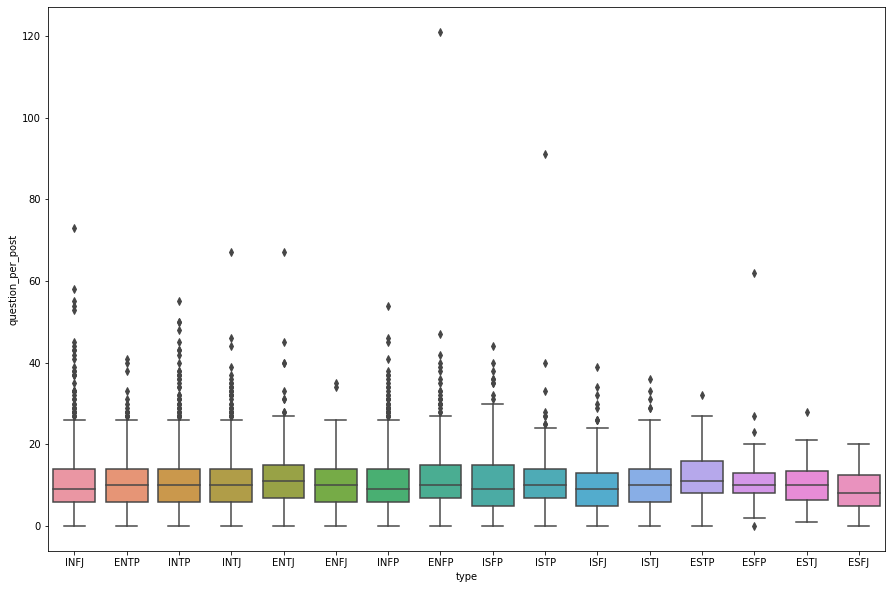

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot("type", "question_per_post", data=df)

In [28]:
df[['type','excl_per_post']].groupby('type').mean().sort_values(by='excl_per_post', ascending=False)

,excl_per_post
type,
ENFP,16.939259
ENFJ,13.800000
ESFJ,11.523810
ESFP,10.958333
ISFJ,10.475904
ISFP,10.398524
INFP,9.322052
INFJ,9.077551
ENTJ,8.298701


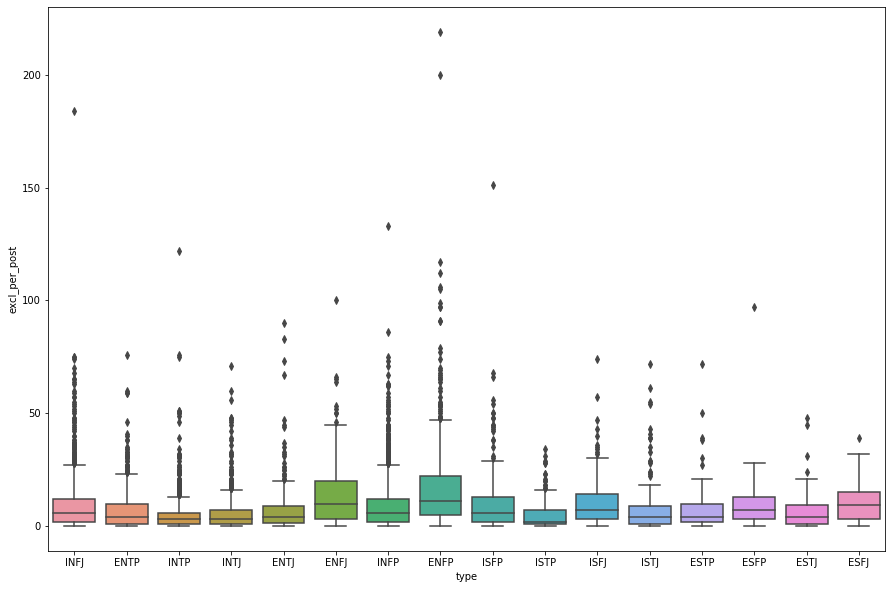

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot("type", "excl_per_post", data=df)

In [31]:
df[['type','ellipsis_per_post']].groupby('type').mean().sort_values(by='ellipsis_per_post', ascending=False)

,ellipsis_per_post
type,
ENFJ,37.221053
INFJ,36.071429
ENFP,35.794074
INFP,33.829694
ISFJ,33.072289
ENTJ,32.333333
ESFJ,31.928571
ISTJ,31.917073
INTP,31.608896


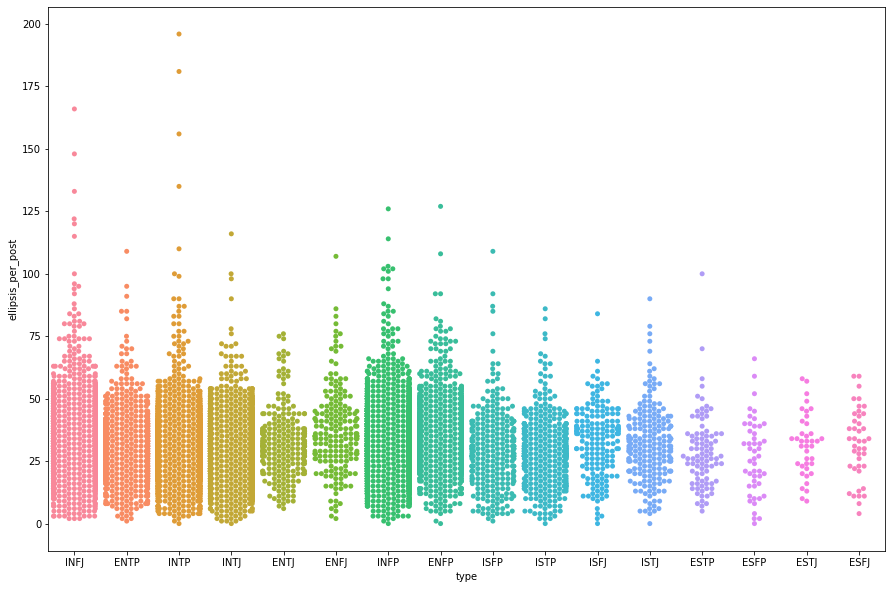

In [33]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "ellipsis_per_post", data=df)

In [34]:
df[['type','img_per_post']].groupby('type').mean().sort_values(by='img_per_post', ascending=False)

,img_per_post
type,
ESTP,0.876404
INTP,0.786043
INFP,0.776747
INTJ,0.735105
ISFP,0.730627
ISTP,0.700297
ISFJ,0.698795
ISTJ,0.668293
ENTJ,0.649351


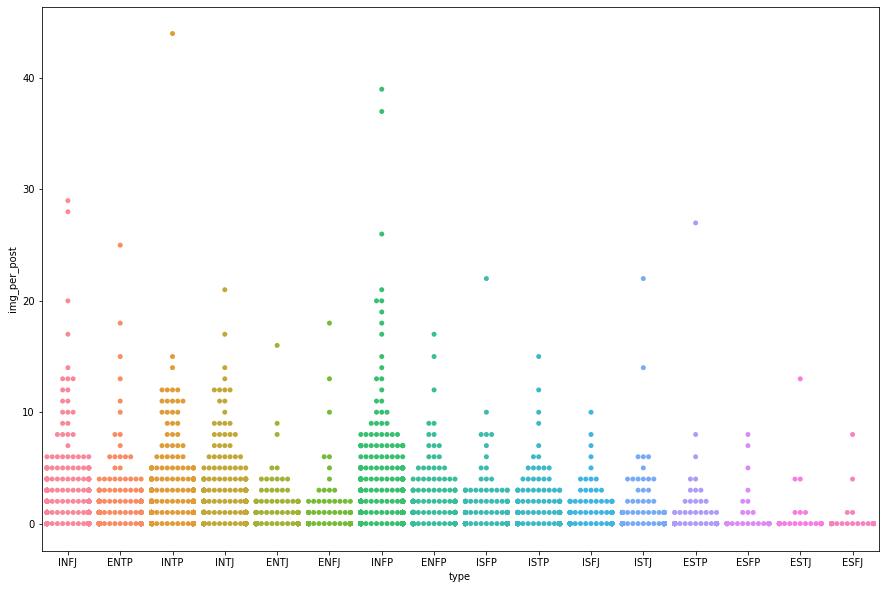

In [37]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "img_per_post", data=df)